## Import das bibliotecas utilizadas


In [39]:
import pandas as pd
import numpy as np
import openpyxl

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import multimode
from sklearn.metrics import mean_squared_error, mean_absolute_error


### Funções auxiliares

In [40]:
#MAPE function

#def mape(df_model_true, df_model_pred):
#    df_model_true, df_model_pred = np.array(df_model_true), np.array(df_model_pred)
#    return np.mean(np.abs((df_model_true - df_model_pred)/ df_model_true)) *100


In [41]:
# Metrics mae rmse mape
#def metrics(df_model_true, df_model_pred,model_name):
#    df_model_true = df_model_true.values
#    df_model_pred = df_model_pred.values
#    mape = round(mape(df_model_true, df_model_pred),5)
#    mae = round(mean_absolute_error(df_model_true, df_model_pred),5)
#    rmse = round(np.sqrt(mean_squared_error(df_model_true, df_model_pred)),5)
#
#    metrics = pd.DataFrame({'Model': model_name,'mae': mae, 'rmse': rmse, 'mape': mape}, index=[0])
#    return metrics

### Carregamento dos dados para a parte de Modelagem

In [42]:
df_transposed_copy_inputting_v19 = pd.read_csv(r'Projeto/Data/Output/df_transposed_copy_inputting_v19.csv')


## Modelagem

Modelos de Forecasting são divididos em partes pré e pós período desejado para previsão. Os períodos utilizados devem ser equiparáveis ao tipo de questão analisada.

In [43]:
df_model = df_transposed_copy_inputting_v19.copy()

In [44]:
df_model['year'] = pd.to_datetime(df_model['year'], format='ISO8601')


In [45]:
df_model.set_index('year', inplace = True)
df_model.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 49 entries, 1980-01-01 to 2028-01-01
Columns: 228 entries, Afghanistan to World
dtypes: float64(228)
memory usage: 87.7 KB


In [46]:
df_model.head(5)

,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,...,Emerging and Developing Europe,Emerging market and developing economies,Euro area,European Union,Latin America and the Caribbean,Major advanced economies (G7),Middle East and Central Asia,Other advanced economies,Sub-Saharan Africa,World
year,,,,,,,,,,,,,,,,,,,,,
1980-01-01,4.345486,2.7,-5.4,2.877381,2.4,8.2,0.7,5.290000,5.399885,2.9,...,-0.8,3.3,3.988678,1.8,6.4,0.9,-1.9,3.8,3.991920,2.1
1981-01-01,7.200000,5.7,3.0,0.385714,-4.4,3.8,-5.7,3.798462,-3.624698,4.1,...,-0.5,1.9,1.792949,0.1,0.9,2.0,-0.2,4.2,4.567689,1.9
1982-01-01,5.116667,2.9,6.4,0.371429,0.0,-0.1,-3.1,2.306923,4.538833,0.1,...,1.4,1.5,5.395555,0.6,-0.5,-0.1,0.4,2.2,8.037341,0.7
1983-01-01,4.283333,1.1,5.4,1.471429,4.2,5.4,3.7,0.815385,1.930603,-0.5,...,4.6,1.8,4.752000,1.7,-2.8,3.3,0.7,4.0,3.300508,2.6
1984-01-01,6.166667,2.0,5.6,2.585714,6.0,10.2,2.0,-0.676154,-15.680825,6.3,...,4.1,4.1,-0.599934,2.5,3.9,5.0,0.3,6.6,5.023940,4.6


#### Training and Test set

In [47]:
test_years = 5
train_data = df_model.iloc[:-test_years, :]
train_data.tail(1)

,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,...,Emerging and Developing Europe,Emerging market and developing economies,Euro area,European Union,Latin America and the Caribbean,Major advanced economies (G7),Middle East and Central Asia,Other advanced economies,Sub-Saharan Africa,World
year,,,,,,,,,,,,,,,,,,,,,
2023-01-01,3.0,2.2,2.6,1.3,3.5,5.5,0.2,5.5,1.6,1.6,...,1.2,3.9,0.8,0.7,1.6,1.1,2.9,1.8,3.6,2.8


In [48]:
test_data = df_model.iloc[-test_years:, :]
test_data.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5 entries, 2024-01-01 to 2028-01-01
Columns: 228 entries, Afghanistan to World
dtypes: float64(228)
memory usage: 8.9 KB


### SARIMAX com variável exógena

Exogenous variables: The idea is collect the relevant data about exogenous variables which can interfere in the sasonality of the model. In this case we'll try to catch some global exogenous variables: 2008's recession and 2020's pandemic.




In [49]:
#exogenous variables

#train_exog = train_data.iloc[:,1:]
#test_exog = test_data.iloc[:,1:]
#
#test_exog.head()

In [50]:
#from datetime import datetime
#
## Supondo que você já tem os conjuntos de dados train_data e test_data carregados
#
## Definindo os limites dos intervalos de anos como objetos datetime
#primeiro_intervalo_inicio = datetime(2007, 1, 1)
#primeiro_intervalo_fim = datetime(2010, 1, 1)
#
#segundo_intervalo_inicio = datetime(2020, 1, 1)
#segundo_intervalo_fim = datetime(2023, 1, 1)
#
## Filtrando as linhas dos conjuntos de dados com base nos intervalos de anos
#train_exog_filtered = train_data[
#    (train_data.index >= primeiro_intervalo_inicio) & (train_data.index < primeiro_intervalo_fim) & (test_data.index >= segundo_intervalo_inicio) & (test_data.index < segundo_intervalo_fim)
#]
#
#test_exog_filtered = test_data[
#    (test_data.index >= segundo_intervalo_fim)
#    ]
## Exibindo as primeiras linhas dos conjuntos de dados filtrados
#print("Conjunto de treino filtrado:")
#print(train_exog_filtered.head())
#
#print("\nConjunto de teste filtrado:")
#print(test_exog_filtered.head())





In [51]:
exog = df_model[['World']]
train_exog = exog[:-test_years]
test_exog = exog[-test_years:]

In [52]:
from pmdarima.arima import auto_arima


In [53]:
#Forecasting Model
#for country in df_model.columns: 
model_sarimax_exog = auto_arima(y = train_data['United States'],
                   x = train_exog,
        m=4,
        test='adf',
        seasonal=True,
        stepwise=False,
#        d=0,
#        start_p=0,
#        max_p=1,
#        start_q=0,
#        max_q=1,
)

In [54]:
model_sarimax_exog.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   44
Model:                        SARIMAX   Log Likelihood                 -92.278
Date:                Tue, 29 Aug 2023   AIC                            188.557
Time:                        17:15:42   BIC                            192.125
Sample:                    01-01-1980   HQIC                           189.880
                         - 01-01-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.5477      0.324      7.860      0.000       1.912       3.183
sigma2         3.8829      0.722      5.375      0.000       2.467       5.299
===================================================================================
Ljung-Box (L1) (Q):                   0.94   Jarque-Bera (JB):                 6.00
Prob(Q):                              0.33   Prob(JB):                         0.05
Heteroskedasticity (H):               0.98   Skew:                            -0.71
Prob(H) (two-sided):                  0.96   Kurtosis:                         4.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [55]:
# Predictions

predictions_sarimax_exog = model_sarimax_exog.predict(n_periods = test_years, x = test_exog).rename("SARIMAX")
predictions_sarimax_exog.head()

2024-01-01    2.547727
2025-01-01    2.547727
2026-01-01    2.547727
2027-01-01    2.547727
2028-01-01    2.547727
Freq: AS-JAN, Name: SARIMAX, dtype: float64

<Axes: xlabel='year'>

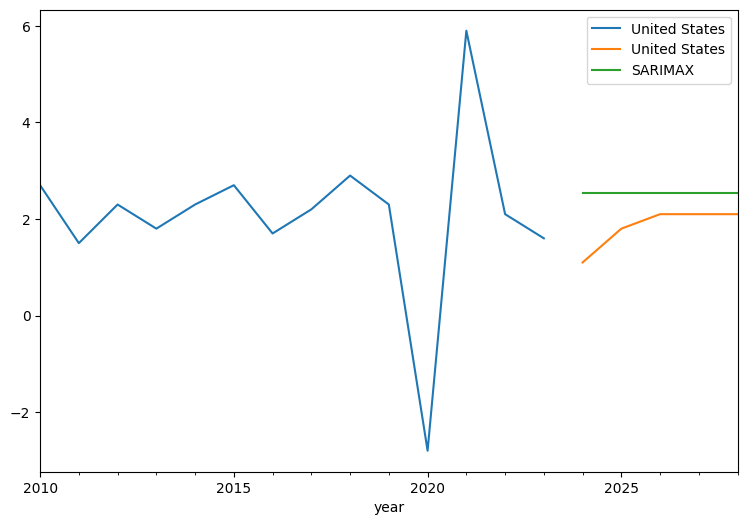

In [56]:
# Visualization

train_data['United States']['2010-01-01':].plot(figsize = (9,6), legend = True)
test_data['United States'].plot(legend = True)
predictions_sarimax_exog.plot(legend = True)

#### KPIS de Avaliação do Modelo
 Indicadores para medir a performance do modelo. MAE e RSME são indicadores de performance para modelos de regressão com variáveis dependentes contínuas. Não existem indicadores considerados 'perfeitos', existem os indicadores melhores apropriados para o problema analisado.

 - MAE - (Mean Absolute Error) É um indicador mais interpretável, utilizado quando a série temporal trata de taxas, porcentagens.
- RSME -  (Root Square Mean Error) São utilizados para modelos com outliers/extremos.
- MAPE - (Mean Absolute Percentage Error) Apesar de tratar os erros de forma absoluta é considerado um indicador mais agradável para comunicar a respeito do modelo. 

In [57]:
print(round(mean_absolute_error(test_data['United States'], predictions_sarimax_exog),2))
print(round(np.sqrt(mean_squared_error(test_data['United States'], predictions_sarimax_exog)),2))


0.71
0.81


In [58]:
#MAPE function

def MAPE(df_model_true, df_model_pred):
    df_model_true, df_model_pred = np.array(df_model_true), np.array(df_model_pred)
    return np.mean(np.abs((df_model_true - df_model_pred)/ df_model_true)) *100

#for country in df_model.columns:
MAPE(test_data['United States'], predictions_sarimax_exog)

47.4226026498754

### Export forecasts for Sarimax Exog

In [59]:
## Export forecast

predictions_sarimax_exog.to_csv('Projeto/Data/Output/predictions_sarimax_exog.csv', index = True)

### Modelo SARIMAX sem variável exógena

In [60]:
model_sarimax_no_exog = auto_arima(train_data['United States'],
        m=4,
        test='adf',
        seasonal=True,
        stepwise=False,
        d=0,
        start_p=0,
        max_p=1,
        start_q=0,
        max_q=1,
)

In [61]:
model_sarimax_no_exog.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   44
Model:                        SARIMAX   Log Likelihood                 -92.278
Date:                Tue, 29 Aug 2023   AIC                            188.557
Time:                        17:16:22   BIC                            192.125
Sample:                    01-01-1980   HQIC                           189.880
                         - 01-01-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.5477      0.324      7.860      0.000       1.912       3.183
sigma2         3.8829      0.722      5.375      0.000       2.467       5.299
===================================================================================
Ljung-Box (L1) (Q):                   0.94   Jarque-Bera (JB):                 6.00
Prob(Q):                              0.33   Prob(JB):                         0.05
Heteroskedasticity (H):               0.98   Skew:                            -0.71
Prob(H) (two-sided):                  0.96   Kurtosis:                         4.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [62]:
# Predictions

predictions_sarimax_no_exog = model_sarimax_no_exog.predict(n_periods = test_years).rename("SARIMAX Non Exog")
predictions_sarimax_no_exog.head()

2024-01-01    2.547727
2025-01-01    2.547727
2026-01-01    2.547727
2027-01-01    2.547727
2028-01-01    2.547727
Freq: AS-JAN, Name: SARIMAX Non Exog, dtype: float64

<Axes: xlabel='year'>

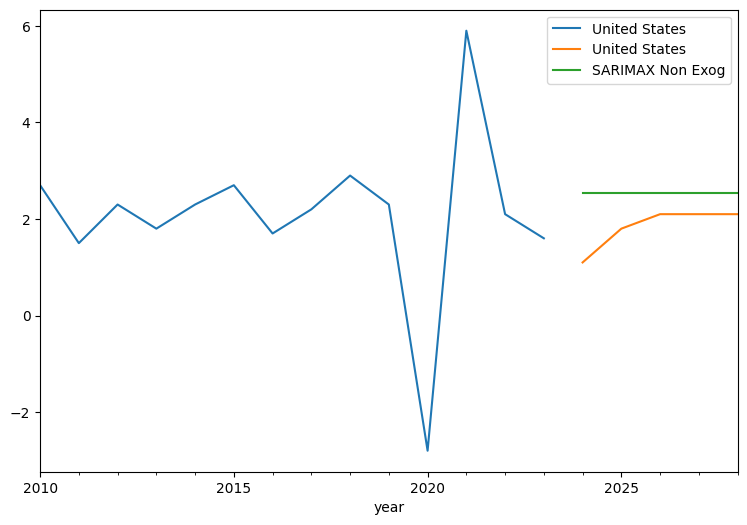

In [63]:
# Visualization

train_data['United States']['2010-01-01':].plot(figsize = (9,6), legend = True)
test_data['United States'].plot(legend = True)
predictions_sarimax_no_exog.plot(legend = True)

In [64]:
print(round(mean_absolute_error(test_data['United States'], predictions_sarimax_no_exog),2))
print(round(np.sqrt(mean_squared_error(test_data['United States'], predictions_sarimax_no_exog)),2))
print(round(MAPE(test_data['United States'], predictions_sarimax_no_exog), 2))

0.71
0.81
47.42


### Modelo AutoARIMA

In [65]:
model_autoarima = auto_arima( train_data['United States'],
        m=4,
        test='adf',
        seasonal= False,
        stepwise=False,
        d=0,
        start_p=0,
        max_p=1,
        start_q=0,
        max_q=1,
)

/home/hingryd/Documents/Lighthouse/DS/venv/lib/python3.10/site-packages/pmdarima/arima/_validation.py:62: UserWarning: m (4) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


In [66]:
model_autoarima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   44
Model:               SARIMAX(1, 0, 1)   Log Likelihood                 -94.529
Date:                Tue, 29 Aug 2023   AIC                            195.058
Time:                        17:16:23   BIC                            200.411
Sample:                    01-01-1980   HQIC                           197.043
                         - 01-01-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9964      0.008    121.511      0.000       0.980       1.012
ma.L1         -0.8982      0.095     -9.406      0.000      -1.085      -0.711
sigma2         4.1027      0.666      6.162      0.000       2.798       5.408
===================================================================================
Ljung-Box (L1) (Q):                   0.84   Jarque-Bera (JB):                 5.16
Prob(Q):                              0.36   Prob(JB):                         0.08
Heteroskedasticity (H):               0.89   Skew:                            -0.18
Prob(H) (two-sided):                  0.82   Kurtosis:                         4.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [67]:
# Predictions

predictions_autoarima = model_autoarima.predict(n_periods = test_years).rename("autoarima")
predictions_autoarima.head()

2024-01-01    2.018819
2025-01-01    2.011603
2026-01-01    2.004413
2027-01-01    1.997249
2028-01-01    1.990111
Freq: AS-JAN, Name: autoarima, dtype: float64

<Axes: xlabel='year'>

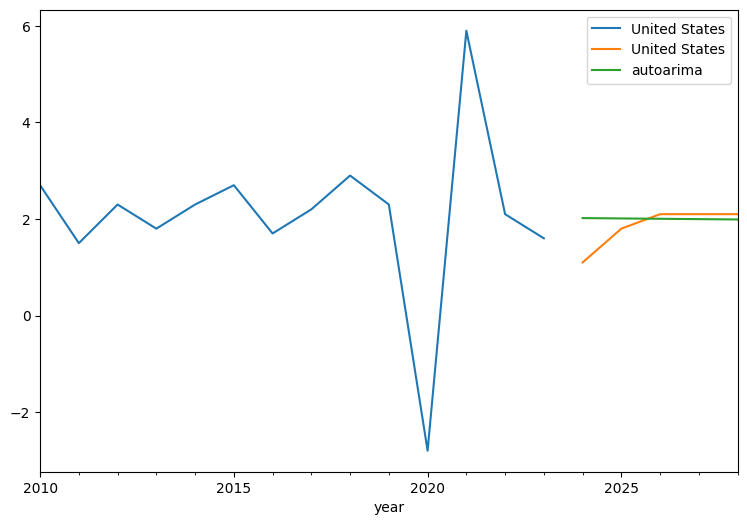

In [68]:
# Visualization

train_data['United States']['2010-01-01':].plot(figsize = (9,6), legend = True)
test_data['United States'].plot(legend = True)
predictions_autoarima.plot(legend = True)

In [69]:
print(round(mean_absolute_error(test_data['United States'], predictions_autoarima),2))
print(round(np.sqrt(mean_squared_error(test_data['United States'], predictions_autoarima)),2))
print(round(MAPE(test_data['United States'], predictions_autoarima), 2))

0.29
0.43
21.99
